In [19]:
using DelimitedFiles
using Dates

In [20]:
wikiEVD = DelimitedFiles.readdlm("wikipediaEVDraw.csv",',')

54×9 Array{Any,2}:
 "25 Nov 2015"  28637  11314  3804  2536  …  4808     14122     3955   
 "18 Nov 2015"  28634  11314  3804  2536     4808     14122     3955   
 "11 Nov 2015"  28635  11314  3805  2536     4808     14122     3955   
 "4 Nov 2015"   28607  11314  3810  2536     4808     14089     3955   
 "25 Oct 2015"  28539  11298  3806  2535     4808     14061     3955   
 "18 Oct 2015"  28476  11298  3803  2535  …  4808     14001     3955   
 "11 Oct 2015"  28454  11297  3800  2534     4808     13982     3955   
 "27 Sep 2015"  28388  11296  3805  2533     4808     13911     3955   
 "20 Sep 2015"  28295  11295  3800  2532     4808     13823     3955   
 "13 Sep 2015"  28220  11291  3792  2530     4808     13756     3953   
 "6 Sep 2015"   28147  11291  3792  2530  …  4808     13683     3953   
 "30 Aug 2015"  28073  11290  3792  2529     4808     13609     3953   
 "16 Aug 2015"  27952  11284  3786  2524     4808     13494     3952   
 ⋮                                        ⋱  

In [21]:
Dates.DateTime(wikiEVD[1,1],"d u y")

2015-11-25T00:00:00

In [22]:
col1 = wikiEVD[:,1]
for i = 1:length(col1)
    col1[i] = Dates.DateTime(col1[i],"d u y")
end

In [23]:
col1

54-element Array{Any,1}:
 2015-11-25T00:00:00
 2015-11-18T00:00:00
 2015-11-11T00:00:00
 2015-11-04T00:00:00
 2015-10-25T00:00:00
 2015-10-18T00:00:00
 2015-10-11T00:00:00
 2015-09-27T00:00:00
 2015-09-20T00:00:00
 2015-09-13T00:00:00
 2015-09-06T00:00:00
 2015-08-30T00:00:00
 2015-08-16T00:00:00
 ⋮                  
 2014-08-09T00:00:00
 2014-07-30T00:00:00
 2014-07-23T00:00:00
 2014-07-14T00:00:00
 2014-07-02T00:00:00
 2014-06-17T00:00:00
 2014-05-27T00:00:00
 2014-05-12T00:00:00
 2014-05-01T00:00:00
 2014-04-14T00:00:00
 2014-03-31T00:00:00
 2014-03-22T00:00:00

In [24]:
#days since 22nd march 2014, epidemic day
#rata gives since 1 jan 001
Dates.datetime2rata(col1[1])

735927

In [25]:
days_since_beg(x) = Dates.datetime2rata(x) - Dates.datetime2rata(col1[54])
epidays = Array{Int64}(undef,54)
for i = 1:54
    epidays[i] = days_since_beg(col1[i])
end

In [26]:
epidays

54-element Array{Int64,1}:
 613
 606
 599
 592
 582
 575
 568
 554
 547
 540
 533
 526
 512
   ⋮
 140
 130
 123
 114
 102
  87
  66
  51
  40
  23
   9
   0

In [27]:
allcases = wikiEVD[:,2]

54-element Array{Any,1}:
 28637
 28634
 28635
 28607
 28539
 28476
 28454
 28388
 28295
 28220
 28147
 28073
 27952
     ⋮
  1835
  1437
  1201
   982
   779
   528
   309
   260
   239
   176
   130
    49

In [28]:
using Plots

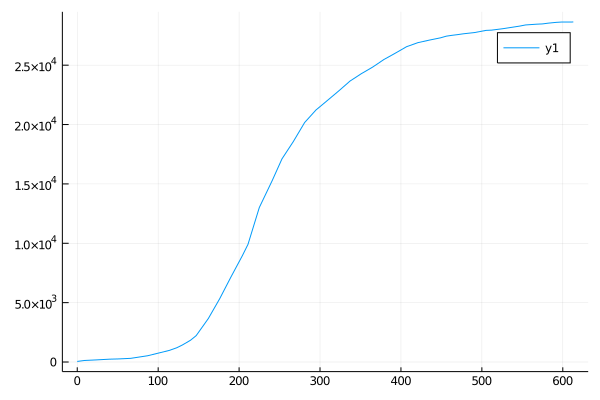

In [29]:
plot(epidays,allcases)

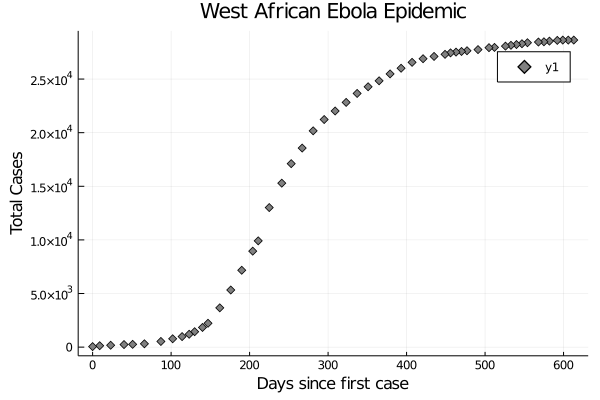

In [30]:
plot(epidays,allcases,
line= (:scatter),
marker = (:diamond,"gray"),
title = "West African Ebola Epidemic",
xlabel = "Days since first case",
ylabel = "Total Cases"
)

In [31]:
savefig("West African Ebola")

In [32]:
#last 10 rows
wikiEVD[end-9:end,:]

10×9 Array{Any,2}:
 "23 Jul 2014"  1201  672  427  319  249     129     525     224   
 "14 Jul 2014"   982  613  411  310  174     106     397     197   
 "2 Jul 2014"    779  481  412  305  115      75     252     101   
 "17 Jun 2014"   528  337  398  264   33      24      97      49   
 "27 May 2014"   309  202  281  186   12      11      16       5   
 "12 May 2014"   260  182  248  171   12      11        "–"     "–"
 "1 May 2014"    239  160  226  149   13      11        "-"     "-"
 "14 Apr 2014"   176  110  168  108    8       2        "–"     "–"
 "31 Mar 2014"   130   82  122   80    8       2        "–"     "–"
 "22 Mar 2014"    49   29   49   29     "–"     "–"     "–"     "–"

In [33]:
rows, cols = size(wikiEVD)
for j = 1:cols
    for i = 1:rows
        if !isdigit(string(wikiEVD[i,j])[1])
            wikiEVD[i,j] = 0
        end
    end
end

In [34]:
#last 10 rows again
wikiEVD[end-9:end,:]

10×9 Array{Any,2}:
 "23 Jul 2014"  1201  672  427  319  249  129  525  224
 "14 Jul 2014"   982  613  411  310  174  106  397  197
 "2 Jul 2014"    779  481  412  305  115   75  252  101
 "17 Jun 2014"   528  337  398  264   33   24   97   49
 "27 May 2014"   309  202  281  186   12   11   16    5
 "12 May 2014"   260  182  248  171   12   11    0    0
 "1 May 2014"    239  160  226  149   13   11    0    0
 "14 Apr 2014"   176  110  168  108    8    2    0    0
 "31 Mar 2014"   130   82  122   80    8    2    0    0
 "22 Mar 2014"    49   29   49   29    0    0    0    0

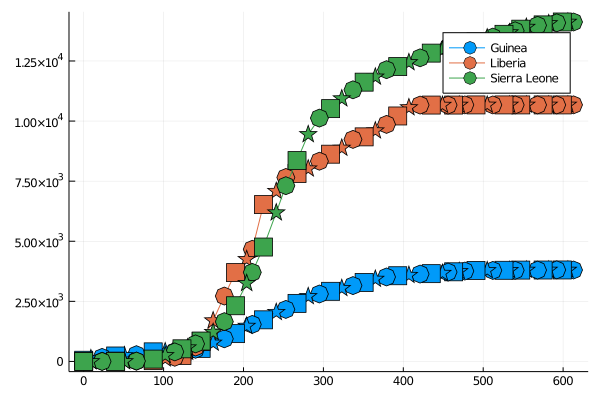

In [56]:
gr()
plot(epidays,[wikiEVD[:,4],wikiEVD[:,6],wikiEVD[:,8]],
label = ["Guinea" "Liberia" "Sierra Leone"],
marker = ([:octagon, :star, :square], 9)
)

In [39]:
function updateSIR(popnvector)
    suspectibles = popnvector[1]
    infected = popnvector[2]
    removed = popnvector[3]
    newS = suspectibles - lambda*suspectibles*infected*dt
    newI = infected + lambda*suspectibles*infected*dt - gamma*infected*dt
    newR = removed + gamma*infected*dt
    return [newS,newI,newR]
end

updateSIR (generic function with 1 method)

In [86]:
dt = 0.5
lambda = 1/200
gamma = 1/10
popnvector = [1000,10,20]
updateSIR(popnvector)

3-element Array{Float64,1}:
 975.0
  34.5
  20.5

In [87]:
dt = 0.5
lambda = 5*10^-6
gamma = 1/20
popnvector = [5.0e5,4.,0.]
tfinal = 610
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef,nsteps+1,3)
timeVector = Array{Float64}(undef,nsteps+1)
timeVector[1] = 0
resultvals[1,:] = popnvector
for steps = 1:nsteps
    resultvals[steps+1,:] = updateSIR(resultvals[steps,:])
    timeVector[steps+1] = timeVector[steps]+dt
end

In [88]:
resultvals[nsteps,:]

3-element Array{Float64,1}:
      1.2663620413548102e-33
      2.8423956563203734e-8 
 500003.99999997095         

In [89]:
gr()

Plots.GRBackend()

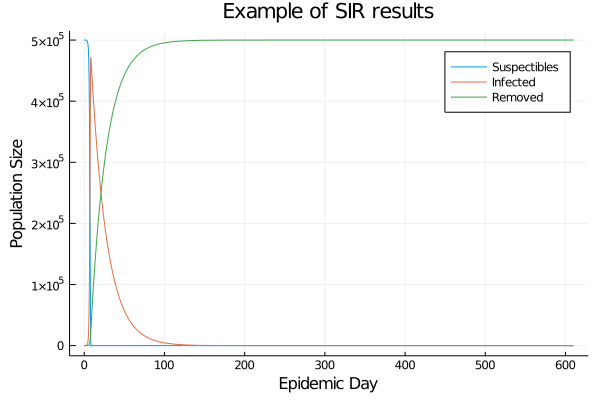

In [90]:
plot(timeVector,
    resultvals,
    title = "Example of SIR results",
    xlabel = "Epidemic Day",
    ylabel = "Population Size",
    labels = ["Suspectibles" "Infected" "Removed"]
)

In [91]:
svals = resultvals[:,1]
ivals = resultvals[:,2]

1221-element Array{Float64,1}:
     4.0                  
     8.900000000000002    
    19.80238875000001     
    44.05951669046108     
    98.02792207570016     
   218.08861291325715     
   485.12805553098065     
  1078.8144894892127      
  2397.404225118457       
  5319.586301703135       
 11763.940053800283       
 25821.795911462523       
 55752.243682871456       
     ⋮                    
     3.661325782191173e-8 
     3.569792637636393e-8 
     3.480547821695484e-8 
     3.3935341261530963e-8
     3.308695772999269e-8 
     3.225978378674287e-8 
     3.1453289192074296e-8
     3.066695696227244e-8 
     2.990028303821563e-8 
     2.915277596226024e-8 
     2.8423956563203734e-8
     2.771335764912364e-8 

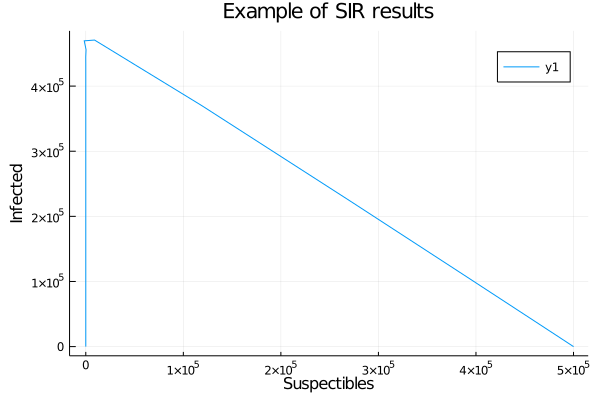

In [92]:
plot(svals,
    ivals,
    title = "Example of SIR results",
    xlabel = "Suspectibles",
    ylabel = "Infected",
)

In [93]:
ar = Array{Any}(undef,4)
fill!(ar,"Hello Gaucho")

4-element Array{Any,1}:
 "Hello Gaucho"
 "Hello Gaucho"
 "Hello Gaucho"
 "Hello Gaucho"

In [94]:
wikiEVD[1,:]

9-element Array{Any,1}:
      "25 Nov 2015"
 28637             
 11314             
  3804             
  2536             
 10675             
  4808             
 14122             
  3955             

In [95]:
epidays[end-9:end]

10-element Array{Int64,1}:
 123
 114
 102
  87
  66
  51
  40
  23
   9
   0

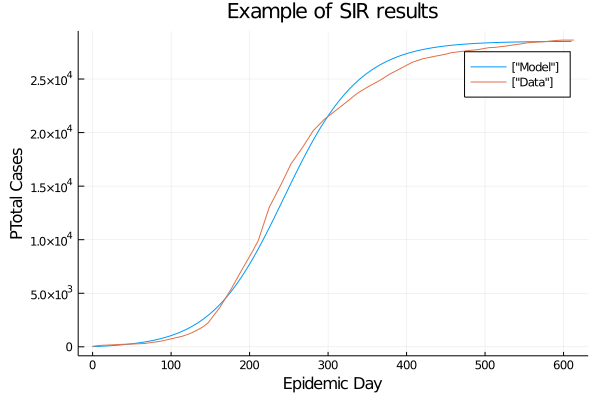

In [106]:
totalcases = wikiEVD[:,2]


dt = 0.5
lambda = 1.47*10^-6
gamma = 0.125
popnvector = [1*10^5,20.,0.]
tfinal = 610
nsteps = round(Int64, tfinal/dt)
resultvals = Array{Float64}(undef,nsteps+1,3)
timeVector = Array{Float64}(undef,nsteps+1)
timeVector[1] = 0
resultvals[1,:] = popnvector
for steps = 1:nsteps
    resultvals[steps+1,:] = updateSIR(resultvals[steps,:])
    timeVector[steps+1] = timeVector[steps]+dt
end

totalvals = resultvals[:,3]+resultvals[:,2]
plot(timeVector,
    totalvals,
    title = "Example of SIR results",
    xlabel = "Epidemic Day",
    ylabel = "PTotal Cases",
    labels = ["Model"]
)

plot!(
    epidays,
    totalcases,
    labels = ["Data"]
)